<a href="https://colab.research.google.com/github/VihaanMotwani/Automated-Diabetic-Foot-Screening-System/blob/main/Greyscale_Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import cv2
import numpy as np
import os
import glob
from google.colab.patches import cv2_imshow

Processed and saved: output/seg_1017085011-IR.jpg


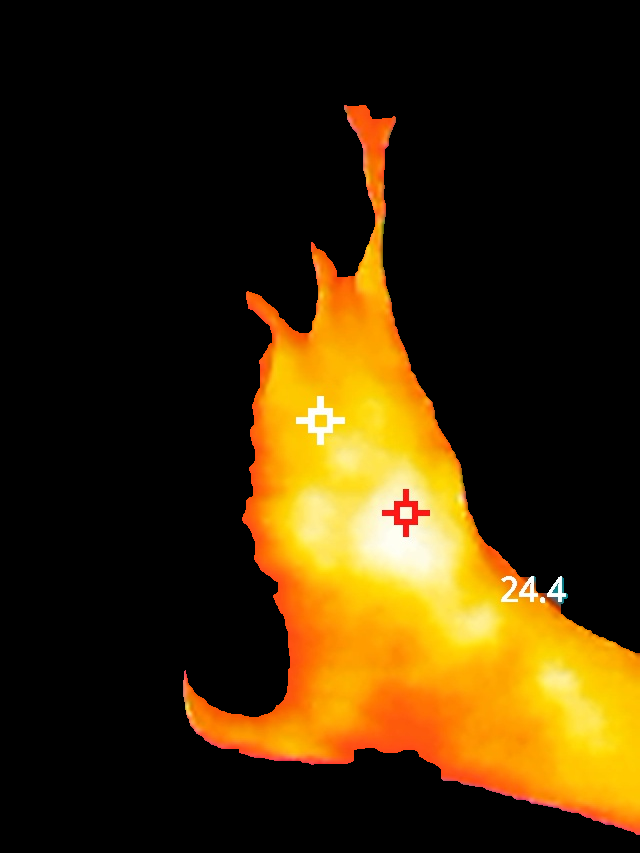

Processed and saved: output/seg_1017084959-IR.jpg


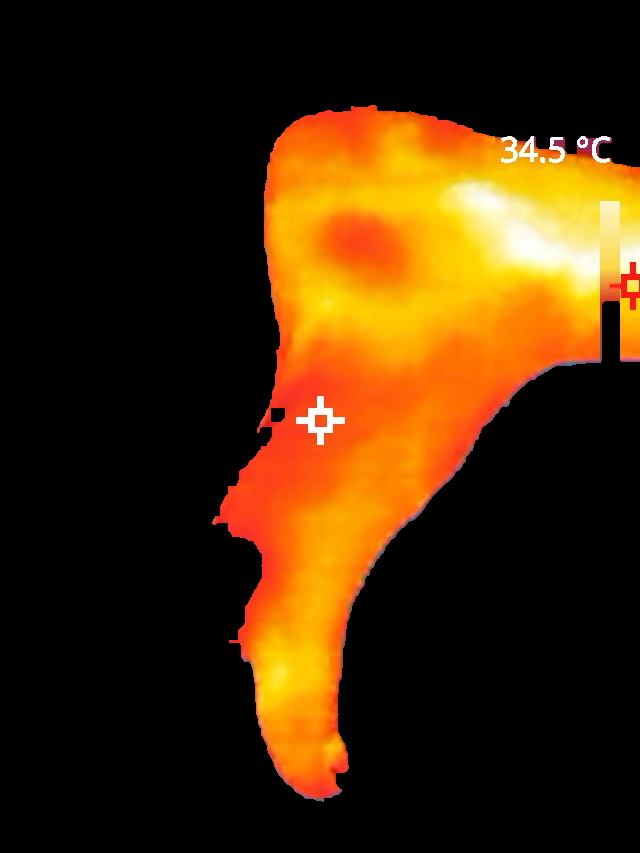

Processed and saved: output/seg_1017084940-IR.jpg


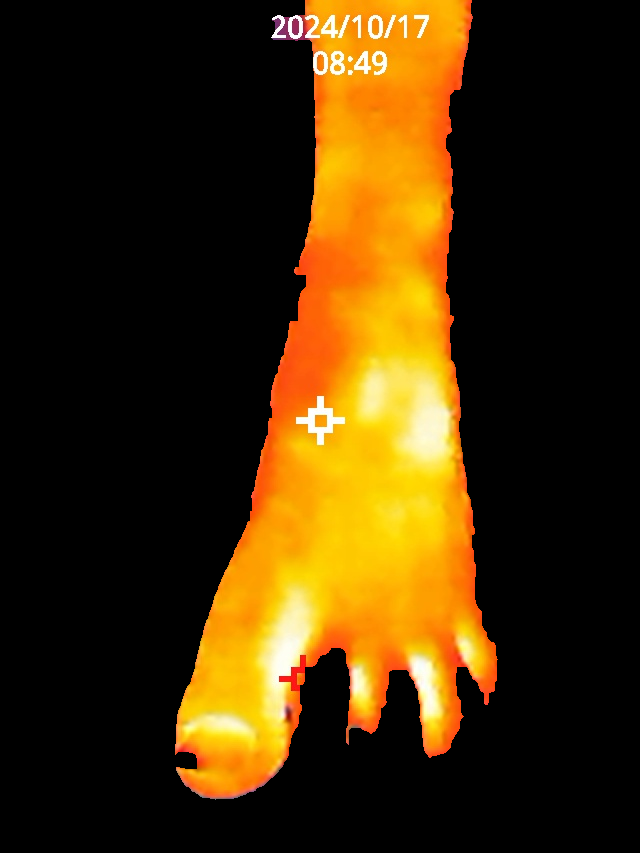

Processed and saved: output/seg_1017084927-IR.jpg


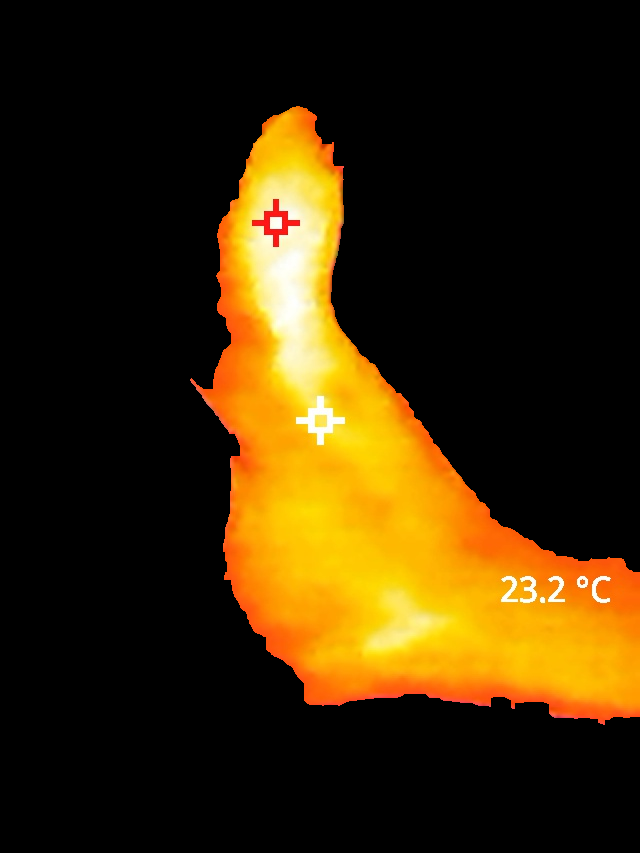

Processed and saved: output/seg_1017084836-IR.jpg


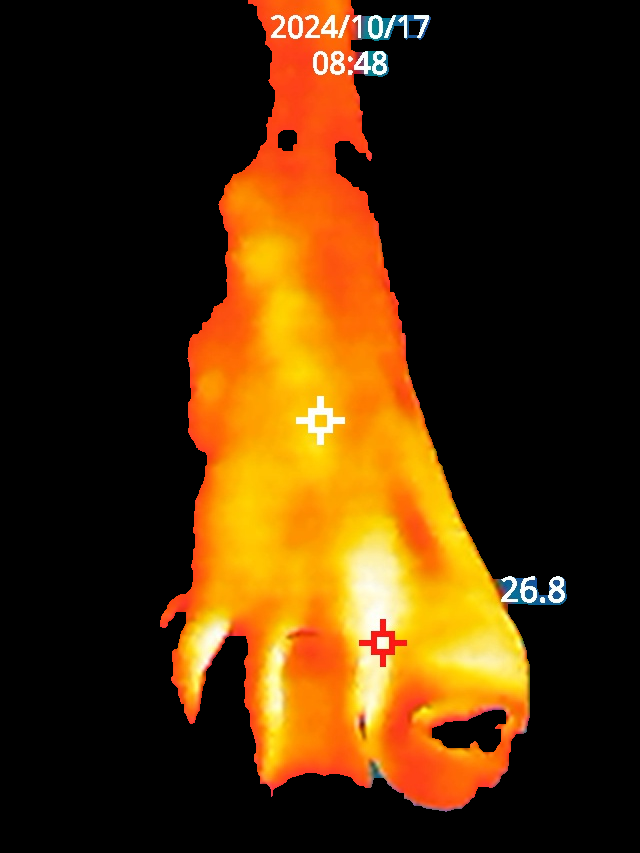

Processed and saved: output/seg_1017084917-IR.jpg


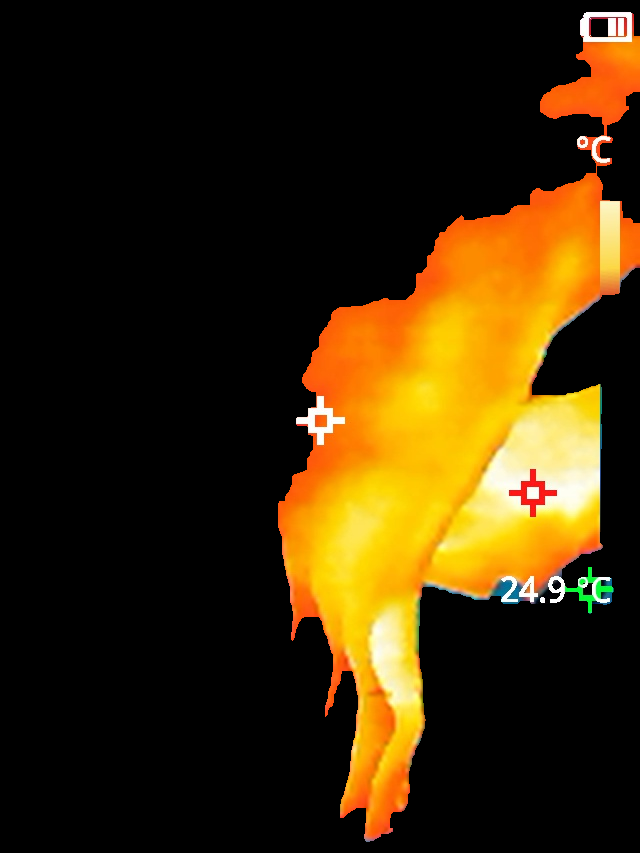

Processed and saved: output/seg_1017084950-IR.jpg


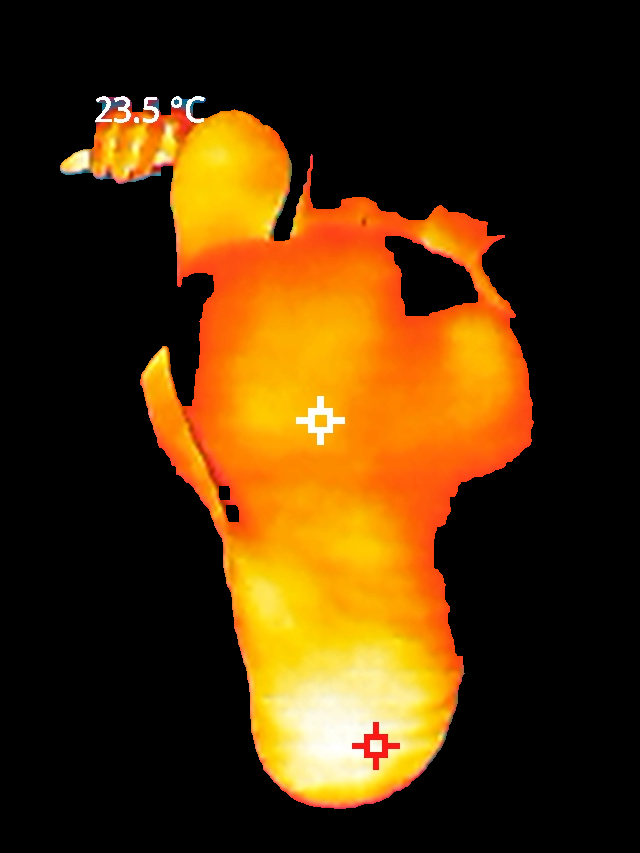

Processed and saved: output/seg_1017084827-IR.jpg


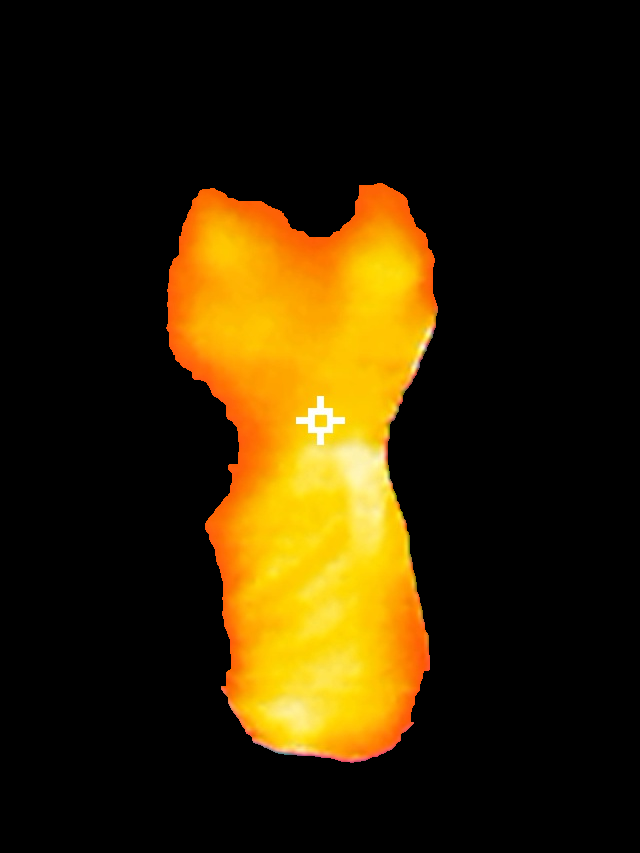

In [23]:
input_folder = "images"
output_folder = "output"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop over all .jpg files in the input folder
for img_path in glob.glob(os.path.join(input_folder, "*.jpg")):
    # Read the original image in color (to preserve thermal data)
    original = cv2.imread(img_path)
    if original is None:
        print(f"Could not read {img_path}. Skipping...")
        continue

    # Convert the image to grayscale for segmentation purposes
    gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Otsu's thresholding to create a binary image
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Morphological closing to fill small holes
    kernel = np.ones((10, 10), np.uint8)
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Find connected components in the closed mask
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(closed, connectivity=8)

    # If more than one component is found (excluding background), keep the largest one (assumed to be the foot)
    if num_labels > 1:
        largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
        foot_mask = np.uint8(labels == largest_label) * 255
    else:
        foot_mask = closed

    # Combine the mask with the original image to extract the foot region
    foot_segmented = cv2.bitwise_and(original, original, mask=foot_mask)

    # Save the resulting image
    filename = os.path.basename(img_path)
    out_path = os.path.join(output_folder, f"seg_{filename}")
    cv2.imwrite(out_path, foot_segmented)
    print(f"Processed and saved: {out_path}")

    # Optionally, display the result (press any key to continue)
    cv2_imshow(foot_segmented)
    cv2.waitKey(0)

cv2.destroyAllWindows()